In [1]:
import warnings
warnings.filterwarnings('ignore')

import gc
import re
import string
import operator
from collections import defaultdict

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
import seaborn as sns

#import tokenization
#from wordcloud import STOPWORDS

from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import precision_score, recall_score, f1_score

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, Callback

SEED = 1337

print(1)

1


In [2]:
df_train = pd.read_csv('./ds/train.csv', dtype={'id': np.int16, 'target': np.int8})

print('Training Set Shape = {}'.format(df_train.shape))
print('Training Set Memory Usage = {:.2f} MB'.format(df_train.memory_usage().sum() / 1024**2))

Training Set Shape = (9473201, 9)
Training Set Memory Usage = 650.47 MB


In [3]:
diabetes_data = df_train.copy(deep = True)
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9473201 entries, 0 to 9473200
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   x         float64
 1   y         float64
 2   z         int64  
 3   t         float64
 4   terror    float64
 5   q         float64
 6   flag      int64  
 7   event_id  int64  
 8   hit_id    int64  
dtypes: float64(5), int64(4)
memory usage: 650.5 MB


In [4]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['x','y','t','q']] = diabetes_data_copy[['x','y','t','q']].replace(0,np.NaN)
## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

x           0
y           0
z           0
t           0
terror      0
q           0
flag        0
event_id    0
hit_id      0
dtype: int64


AttributeError: 'DataFrame' object has no attribute 'patches'

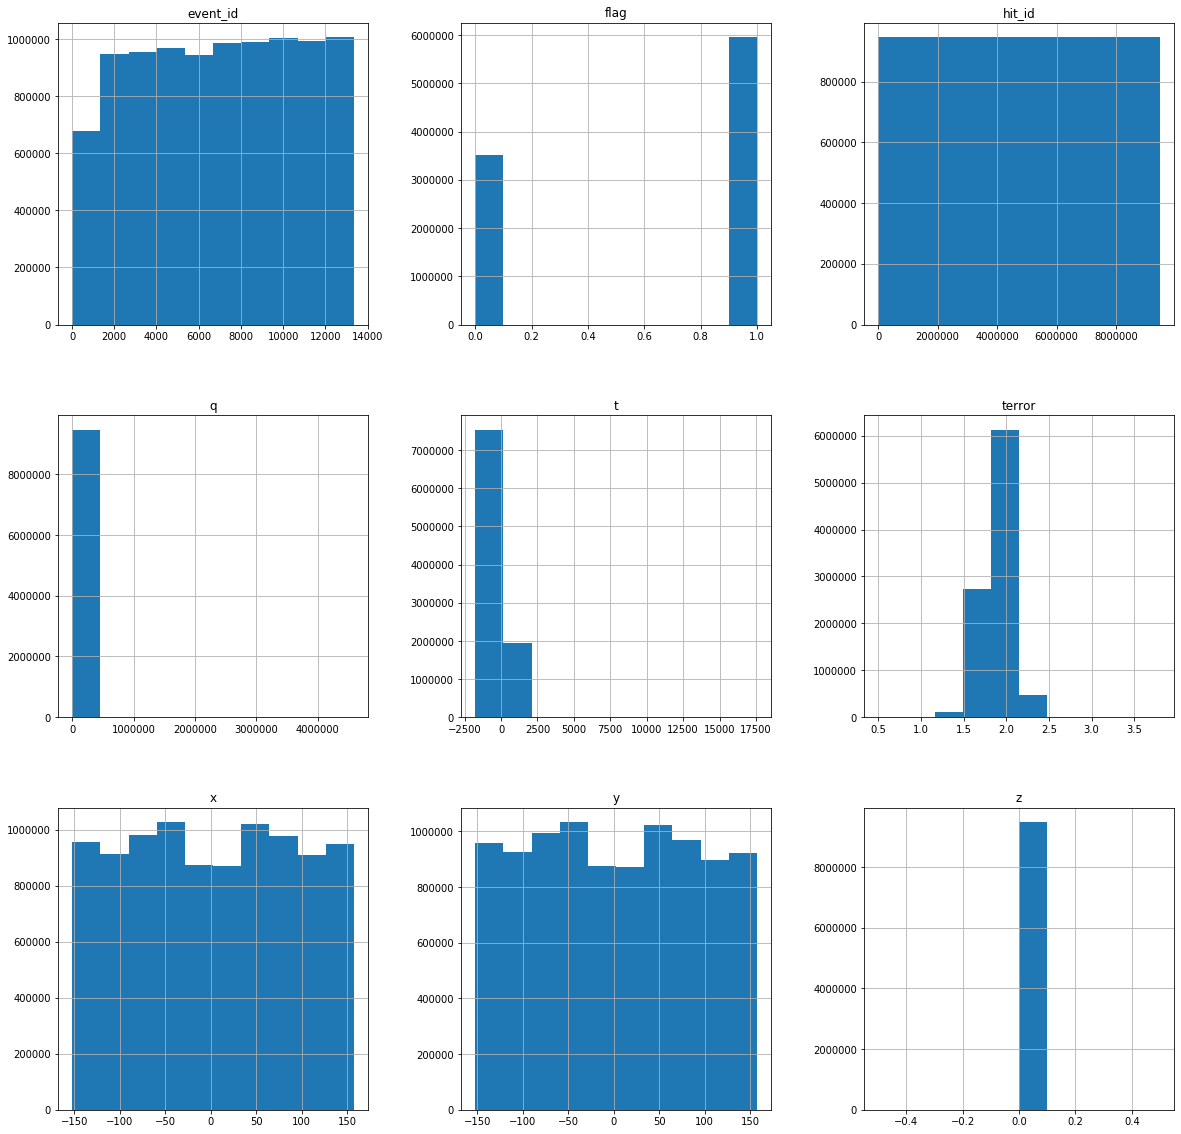

In [7]:
p = diabetes_data.hist(figsize = (20,20))

for rect in diabetes_data.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom') 

In [6]:
diabetes_data.shape

(9473201, 9)